In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

test_dir = "C:\\Users\\barun\\OneDrive\\Documents\\ML projects\\3 - Cats vs Dogs\\Datasets\\test"
train_dir = "C:\\Users\\barun\\OneDrive\Documents\\ML projects\\3 - Cats vs Dogs\Datasets\\train"

train_dataset = image_dataset_from_directory(train_dir,
                                             image_size=(150, 150),
                                             batch_size=32,
                                             label_mode='binary')

test_dataset = image_dataset_from_directory(test_dir,
                                            image_size=(150, 150),
                                            batch_size=32,
                                            label_mode='binary')

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# Apply normalization
train_dataset = train_dataset.map(lambda x, y: (x/255.0, y))
test_dataset = test_dataset.map(lambda x, y: (x/255.0, y))

In [4]:
# Spliiting the training dataset into train and validation

train_dataset = image_dataset_from_directory(train_dir,
                                             image_size=(150, 150),
                                             batch_size=32,
                                             validation_split=0.2,
                                             subset="training",
                                             seed=42,
                                             label_mode='binary')

val_dataset = image_dataset_from_directory(train_dir,
                                           image_size=(150, 150),
                                           batch_size=32,
                                           validation_split=0.2,
                                           subset="validation",
                                           seed=42,
                                           label_mode='binary')

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


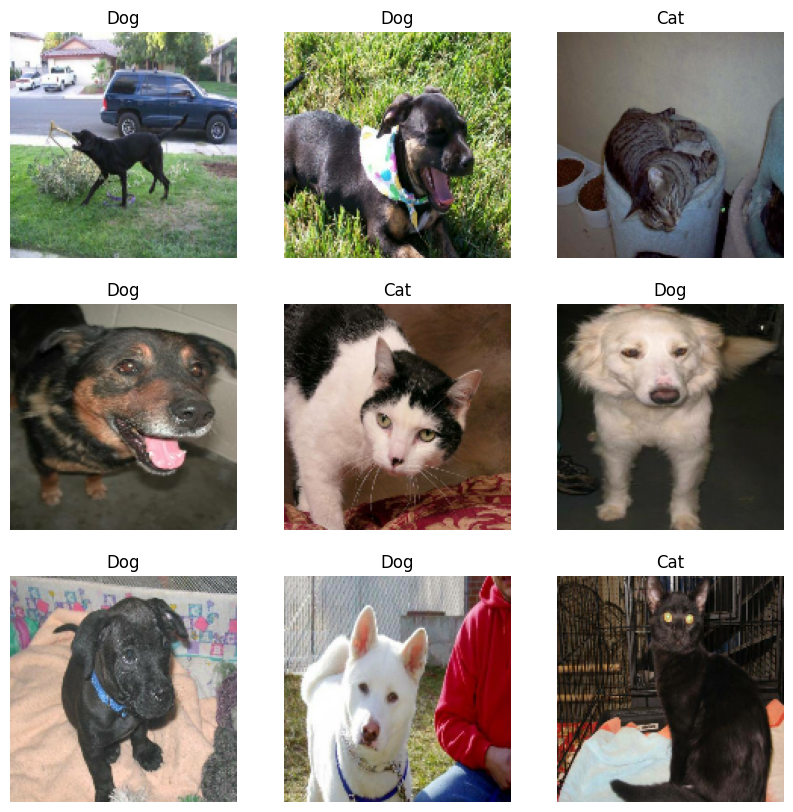

In [5]:
# Visulaizing the images 

image_batch, label_batch = next(iter(train_dataset))

# Display first 9 images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title("Dog" if label_batch[i] == 1 else "Cat")
    plt.axis("off")
plt.show()

In [6]:
# CNN model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

C:\Users\barun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compiling the model and adding the loss function, optimizer and the metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 256s 506ms/step - accuracy: 0.5882 - loss: 32.7768 - val_accuracy: 0.6360 - val_loss: 0.6193
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 511ms/step - accuracy: 0.6606 - loss: 0.6157 - val_accuracy: 0.6612 - val_loss: 0.6169
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 267s 533ms/step - accuracy: 0.7075 - loss: 0.5616 - val_accuracy: 0.7067 - val_loss: 0.6053
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 417s 724ms/step - accuracy: 0.7577 - loss: 0.4981 - val_accuracy: 0.7042 - val_loss: 0.5896
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 229s 458ms/step - accuracy: 0.7729 - loss: 0.4726 - val_accuracy: 0.7243 - val_loss: 0.6080
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 231s 461ms/step - accuracy: 0.8641 - loss: 0.3205 - val_accuracy: 0.7020 - val_loss: 0.8752
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 236s 472ms/step - accuracy: 0.9092 - loss: 0.2175 - val_accuracy: 0.6892 - val_loss: 0.9827
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 233s 466ms/step - accuracy: 0.9417 

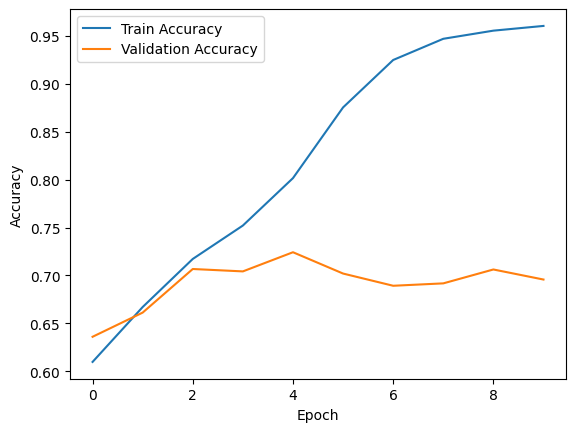

In [9]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Saving the model
model.save("model.h5")

In [11]:
#loading and testing the model
new_model = tf.keras.models.load_model("model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Prediction: Cat 🐱


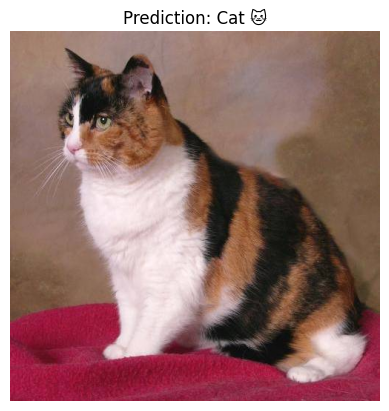

In [17]:
#Predicting the model

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("model.h5")  # Ensure you have saved your trained model

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize image (same as training)
    return img_array

# Function to make a prediction
def predict_image(img_path):
    img_array = preprocess_image(img_path)  # Preprocess the image
    prediction = model.predict(img_array)  # Make prediction

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis("off")

    # Print the prediction result
    if prediction[0][0] > 0.5:
        plt.title("Prediction: Dog 🐶")
        print("Prediction: Dog 🐶")
    else:
        plt.title("Prediction: Cat 🐱")
        print("Prediction: Cat 🐱")
    
    plt.show()

# Example: Predict a single image
img_path = "C:\\Users\\barun\\OneDrive\\Documents\\ML projects\\3 - Cats vs Dogs\\Datasets\\test\\cats\\cat.78.jpg"  
predict_image(img_path)